### Importando as bibliotecas


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Base de dados

In [2]:
dados_diabetes = pd.read_csv('./dataset/diabetes.csv', sep=';')

### Verificando dados do dataset

In [3]:
dados_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gravidez                768 non-null    int64  
 1   glicose                 768 non-null    int64  
 2   pressao_sangue          768 non-null    int64  
 3   espessura_pele          768 non-null    int64  
 4   insulina                768 non-null    int64  
 5   IMC                     768 non-null    float64
 6   predisposicao_diabetes  768 non-null    float64
 7   idade                   768 non-null    int64  
 8   diabetes                768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Tratando e analisando dados

In [4]:
dados_diabetes.head()

,gravidez,glicose,pressao_sangue,espessura_pele,insulina,IMC,predisposicao_diabetes,idade,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Contar número de registros de cada classe 

In [5]:
dados_diabetes.groupby(['diabetes'])['diabetes'].count()

diabetes
0    500
1    268
Name: diabetes, dtype: int64

### Separando conjunto de dados de features e target

In [6]:
X_dados = dados_diabetes.drop('diabetes', axis=1).values
X_dados


array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [7]:
y_dados = dados_diabetes['diabetes'].values
y_dados

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

### Criando a função para balancear os dados.

In [20]:
def balanceamento_dados(X_dados, y_dados):
    under_sample = RandomUnderSampler(random_state= 42)
    X_under, y_under = under_sample.fit_resample(X_dados, y_dados)

    tl = TomekLinks(sampling_strategy='all') # Trabalha com outliers
    X_under, y_under = tl.fit_resample(X_under, y_under)
    
    return X_under, y_under

In [21]:
# Outra forma de verificar o balanceamento
import collections
print(collections.Counter(y_dados))

Counter({0: 500, 1: 268})


### Seprando base de treino e teste

In [22]:
def separa_treino_teste(X_dados, y_dados):
    X_train, X_test, y_train, y_test = train_test_split(X_dados, 
                                                        y_dados,
                                                        random_state=42,
                                                        test_size=0.2) # 80% para teste e 20% para teste
    return X_train, X_test, y_train, y_test

In [23]:
# Separando conjuntos de treino e teste
X_train, X_test, y_train, y_test = separa_treino_teste(X_dados, y_dados)

### Criando modelo de RandomForest

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Criar o classificador Random Forest
classifier = RandomForestClassifier(random_state=42)

# Cria modelo de classificação
modelo = classifier.fit(X_train, y_train)

# Realiza predições
y_pred = modelo.predict(X_test)

### Features importantes

In [25]:
pd.DataFrame(modelo.feature_importances_, columns=['importancia'], 
             index = ['gravidez', 'glicose', 'pressao_sangue', 'espessura_pele', 'insulina',
                      'IMC', 'predisposicao_diabetes', 'idade']).sort_values('importancia', ascending=False)

,importancia
glicose,0.258864
IMC,0.169984
idade,0.140931
predisposicao_diabetes,0.123768
pressao_sangue,0.088134
gravidez,0.076551
insulina,0.076122
espessura_pele,0.065646


### Calculando a acurácia do modelo

In [26]:
acuraria = accuracy_score(y_test, y_pred)
print('Precisão(%): ', acuraria)

Precisão(%):  0.7207792207792207


### Criando matriz de confusão

In [27]:
cm = confusion_matrix(y_test, y_pred)

### Visualizando matris de consufão

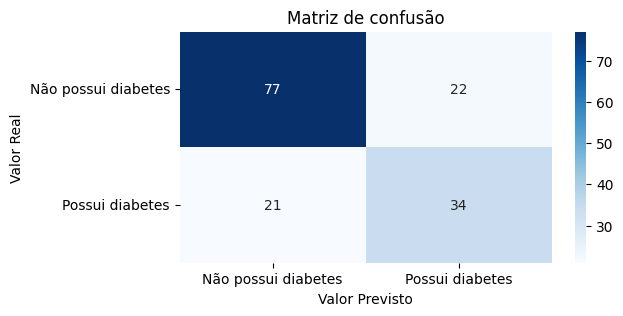

In [28]:
# Definir os rótulos para os eixos
labels = ['Não possui diabetes', 'Possui diabetes']

plt.figure(figsize=(6,3))
sns.heatmap(data=cm, 
            annot=True,
            cmap='Blues',
            xticklabels=labels,
            yticklabels=labels
           )

plt.xlabel('Valor Previsto')
plt.ylabel('Valor Real')
plt.title('Matriz de confusão')
plt.show()

### Caculando métricas de avaliação do modelo

In [29]:
# Gerar o relatório de classificação
report = classification_report(y_test, y_pred)

# Imprimir o relatório de classificação
print(report)

              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154

